# Graduate Admission Analysis

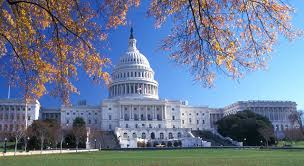

## Problem statement

Applying for a master's program is a very expensive and intensive work. Often students either underestimate their profile and miss the opportunity to study in a better university or overestimate their profile and waste their money by applying for highly ambitious universities.

Our goal is to help students with shortlisting universities with their profiles by a predicted output which gives them a fair idea about their chances for a particular university.

We would like to have a model that will take the parameters which describe the student profile and are considered important during application evaluation by the admission committee and predict the chance of getting admission at a university, so that it will aid the aspiring students in either not letting them miss good opportunities or avoid wasting their money.

## Variable information

- **GRE Scores:** Score out of 340.
- **TOEFL Scores:** Score out of 120.
- **University Rating:** Rating out of 5.
- **Statement of Purpose:** Rating out of 5.
- **Letter of Recommendation:** Rating out of 5.
- **Undergraduate GPA:** Score out of 10.
- **Research Experience:** Either 0 or 1.[](http://) 0 - no, 1 - yes.
- **Chance of Admit:** Ranging from 0 to 100. This is the target variable which we will have to predict.

In [2]:
# importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy import stats
from scipy.stats import norm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# display settings
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)

# filter warnings
import warnings
warnings.filterwarnings("ignore")

# Reading and understanding data

Wondering what's this data about? Let's find it out!

## Importing data

In [3]:
# reading from csv and creating dataframe
df = pd.read_csv("/kaggle/input/graduate-admissions/Admission_Predict_Ver1.1.csv")

## Understanding the dataframe dimensions

In [4]:
# dimensions of the dataframe
print("No. of rows: {}\t\tNo. of columns: {}".format(*df.shape))

No. of rows: 500		No. of columns: 9


In [5]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [6]:
# printing first 5 rows
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [7]:
# printing last 5 rows
df.tail()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
495,496,332,108,5,4.5,4.0,9.02,1,0.87
496,497,337,117,5,5.0,5.0,9.87,1,0.96
497,498,330,120,5,4.5,5.0,9.56,1,0.93
498,499,312,103,4,4.0,5.0,8.43,0,0.73
499,500,327,113,4,4.5,4.5,9.04,0,0.84


**Observations:**

* Dropping Serial No. column as it does not help us to determine the dependant variable.

In [8]:
# dropping the Serial No. column
df.drop(columns=['Serial No.'], inplace=True)

In [9]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
GRE Score,500.0,316.47200,11.295148,290.00,308.0000,317.00,325.00,340.00
TOEFL Score,500.0,107.19200,6.081868,92.00,103.0000,107.00,112.00,120.00
University Rating,500.0,3.11400,1.143512,1.00,2.0000,3.00,4.00,5.00
SOP,500.0,3.37400,0.991004,1.00,2.5000,3.50,4.00,5.00
LOR,500.0,3.48400,0.925450,1.00,3.0000,3.50,4.00,5.00
CGPA,500.0,8.57644,0.604813,6.80,8.1275,8.56,9.04,9.92
Research,500.0,0.56000,0.496884,0.00,0.0000,1.00,1.00,1.00
Chance of Admit,500.0,0.72174,0.141140,0.34,0.6300,0.72,0.82,0.97


# Data cleaning

Let's groom our data.

In [10]:
# column names
list(df.columns)

['GRE Score',
 'TOEFL Score',
 'University Rating',
 'SOP',
 'LOR ',
 'CGPA',
 'Research',
 'Chance of Admit ']

**Observations:**

- There are some trailing spaces in column names of LOR and Chance of Admit, lets remove the trailing spaces.

In [11]:
# removing the trailing spaces in column names
df.rename(columns={'LOR ':'LOR',
                  'Chance of Admit ':'Chance of Admit'}, inplace=True)

In [12]:
# % of missing values in each column
(df.isna().sum() / df.shape[0]) * 100

GRE Score            0.0
TOEFL Score          0.0
University Rating    0.0
SOP                  0.0
LOR                  0.0
CGPA                 0.0
Research             0.0
Chance of Admit      0.0
dtype: float64

**Observations:**

- There are no missing values.

## Dependant variable

We need to treat the missing values in our dependant variable before going for independant variables.

### Chance of Admit

Since, we do not have any missing values in our data set, we do not drop any rows.

Acceptable skew range -1 to 1: -0.289966210041158


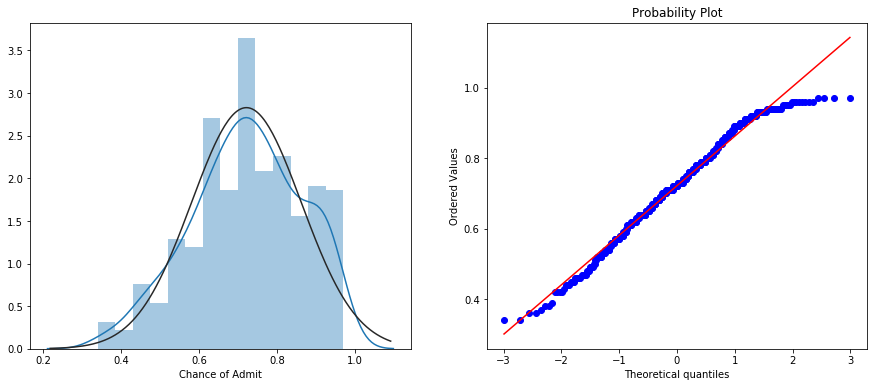

In [13]:
# observing for skew or non-linearness
print("Acceptable skew range -1 to 1:", df['Chance of Admit'].skew())

# deviation of data from normal distribution using QQ plot
fig, ax = plt.subplots(1,2, figsize=(15,6))

mu, sigma = norm.fit(df['Chance of Admit'])
sns.distplot(df['Chance of Admit'], fit=norm, ax=ax[0])
res = stats.probplot(df['Chance of Admit'], plot=ax[1])
plt.show()

**Observations:**  
  * Skew is less, is within acceptable range.
  * Distribution of values is near to normal distribution, are deviating near right tail.
  * No transformation is required to be applied on dependant variable.

## Independant variables

We first treat for outliers and then treat for missing values.

### GRE Score
Continuous variable.

count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


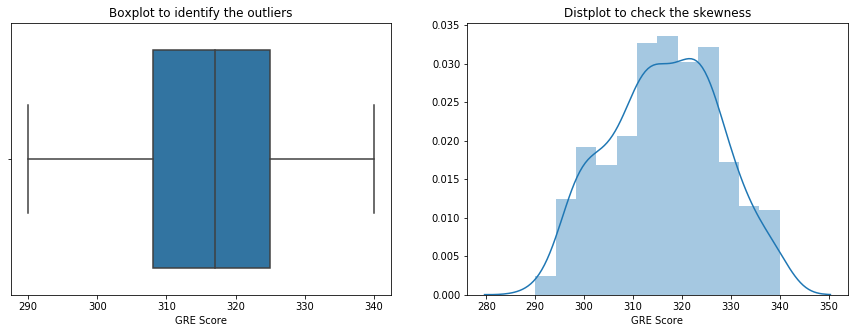

In [14]:
print(df['GRE Score'].describe())

plt.subplots(1,2, figsize=(15,5))

# checking for outliers
plt.subplot(1,2,1)
sns.boxplot(df['GRE Score'])
plt.title("Boxplot to identify the outliers")

# checking the distribution
plt.subplot(1,2,2)
sns.distplot(df['GRE Score'])
plt.title("Distplot to check the skewness")

plt.show()

**Observations:**
* No outliers are found.
* No missing are found.

### TOEFL Score

Continuous variable.

count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


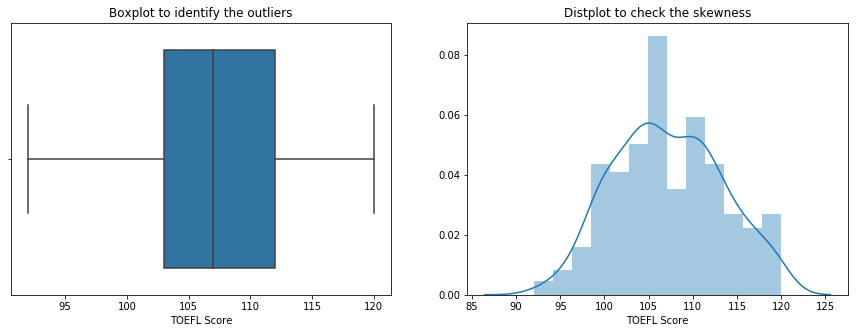

In [15]:
print(df['TOEFL Score'].describe())

plt.subplots(1,2, figsize=(15,5))

# checking for outliers
plt.subplot(1,2,1)
sns.boxplot(df['TOEFL Score'])
plt.title("Boxplot to identify the outliers")

# checking the distribution
plt.subplot(1,2,2)
sns.distplot(df['TOEFL Score'])
plt.title("Distplot to check the skewness")

plt.show()

**Observations:**
* No outliers are found.
* No missing are found.

### University Rating

Categorical variable.

count    500.000000
mean       3.114000
std        1.143512
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: University Rating, dtype: float64


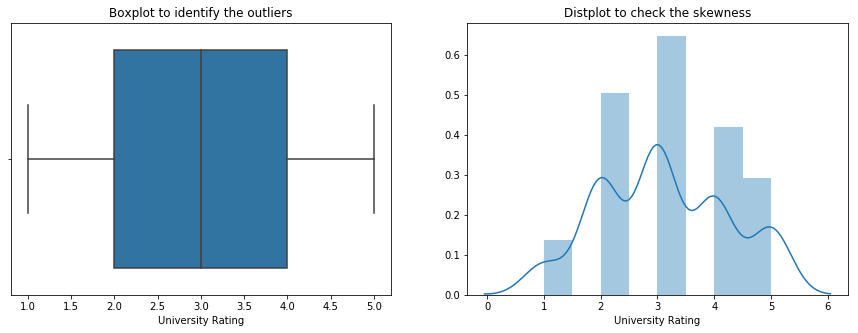

In [16]:
print(df['University Rating'].describe())

plt.subplots(1,2, figsize=(15,5))

# checking for outliers
plt.subplot(1,2,1)
sns.boxplot(df['University Rating'])
plt.title("Boxplot to identify the outliers")

# checking the distribution
plt.subplot(1,2,2)
sns.distplot(df['University Rating'])
plt.title("Distplot to check the skewness")

plt.show()

**Observations:**
* No outliers are found.
* No missing are found.

### SOP

Categorical variable.

count    500.000000
mean       3.374000
std        0.991004
min        1.000000
25%        2.500000
50%        3.500000
75%        4.000000
max        5.000000
Name: SOP, dtype: float64


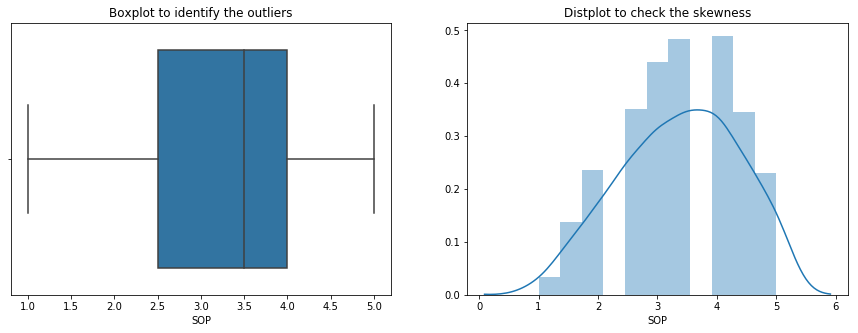

In [17]:
print(df['SOP'].describe())

plt.subplots(1,2, figsize=(15,5))

# checking for outliers
plt.subplot(1,2,1)
sns.boxplot(df['SOP'])
plt.title("Boxplot to identify the outliers")

# checking the distribution
plt.subplot(1,2,2)
sns.distplot(df['SOP'])
plt.title("Distplot to check the skewness")

plt.show()

**Observations:**
* No outliers are found.
* No missing are found.

### LOR

Categorical variable.

count    500.00000
mean       3.48400
std        0.92545
min        1.00000
25%        3.00000
50%        3.50000
75%        4.00000
max        5.00000
Name: LOR, dtype: float64


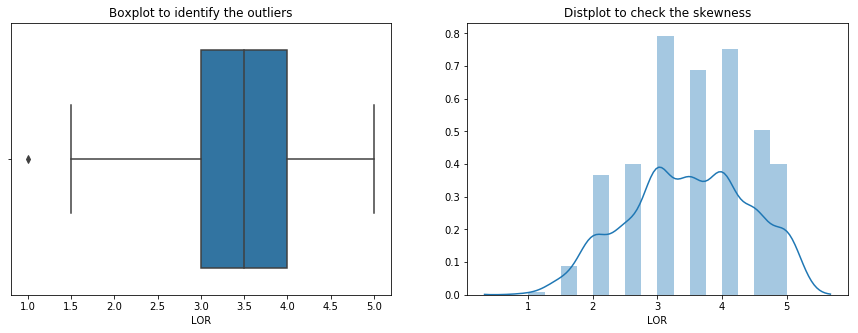

In [18]:
print(df['LOR'].describe())

plt.subplots(1,2, figsize=(15,5))

# checking for outliers
plt.subplot(1,2,1)
sns.boxplot(df['LOR'])
plt.title("Boxplot to identify the outliers")

# checking the distribution
plt.subplot(1,2,2)
sns.distplot(df['LOR'])
plt.title("Distplot to check the skewness")

plt.show()

**Removing outliers:**
* Variable type: Categorical
* Method: IQR
    
**Filling missing values:**
* Variable type: Categorical
* No. of outliers: 1/500, very few
* Method: Median imputation

In [19]:
# removing outliers
Q1 = df['LOR'].quantile(0.25); Q3 = df['LOR'].quantile(0.75); IQR = Q3 - Q1
df['LOR'].loc[((df['LOR'] < Q1-1.5*IQR) | (df['LOR'] > Q3+1.5*IQR))] = np.NaN

# filling missing values
df['LOR'] = df['LOR'].fillna(df['LOR'].median())

### CGPA

Continuous variable.

count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64


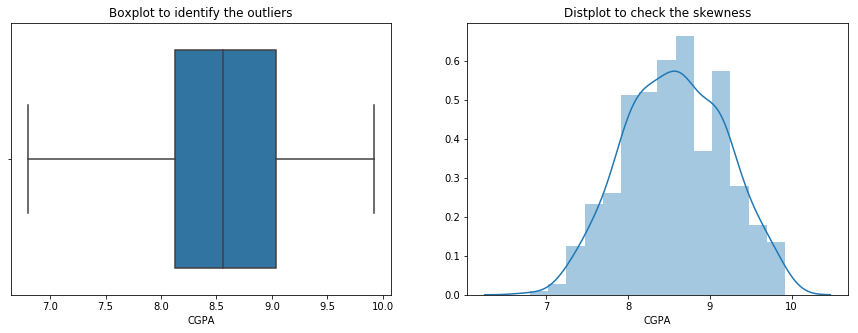

In [20]:
print(df['CGPA'].describe())

plt.subplots(1,2, figsize=(15,5))

# checking for outliers
plt.subplot(1,2,1)
sns.boxplot(df['CGPA'])
plt.title("Boxplot to identify the outliers")

# checking the distribution
plt.subplot(1,2,2)
sns.distplot(df['CGPA'])
plt.title("Distplot to check the skewness")

plt.show()

**Observations:**
* No outliers are found.
* No missing are found.

### Research

Categorical variable.

count    500.000000
mean       0.560000
std        0.496884
min        0.000000
25%        0.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Research, dtype: float64


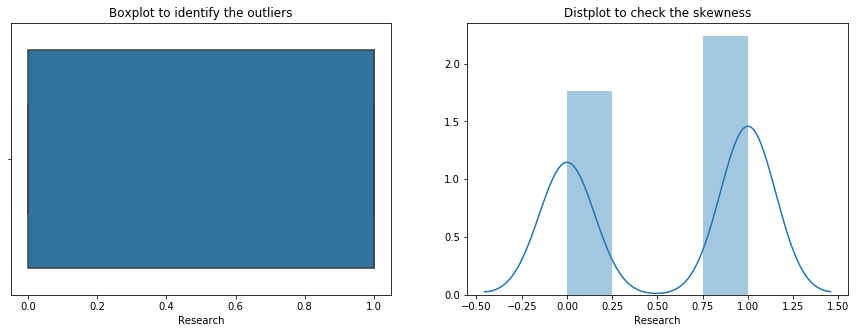

In [21]:
print(df['Research'].describe())

plt.subplots(1,2, figsize=(15,5))

# checking for outliers
plt.subplot(1,2,1)
sns.boxplot(df['Research'])
plt.title("Boxplot to identify the outliers")

# checking the distribution
plt.subplot(1,2,2)
sns.distplot(df['Research'])
plt.title("Distplot to check the skewness")

plt.show()

**Observations:**
* No outliers are found.
* No missing are found.

In [22]:
# checking the variables info at the end of data pre-processing and cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(4)
memory usage: 31.4 KB


# Feature engineering

Let's create a few new variables which makes our data analysis more interesting and help us find few additional insights.

### Chance of Admit

We can turn this continuous variable into categorical variable to get more insights. I'm categorizing values above 75th pecentile as 1 and the rest as 0.

In [23]:
# creating a class for top 75% of students
Q3 = df['Chance of Admit'].quantile(0.75)
df['High Chance'] = df['Chance of Admit'].apply(lambda x: 1 if x > Q3 else 0)

df['High Chance'].value_counts()

0    376
1    124
Name: High Chance, dtype: int64

In [24]:
# checking variables info at the end of feature engineering
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
High Chance          500 non-null int64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


# Exploratory Data Analysis

Let's dive into our data to find some interesting insights.

## Univariate data analysis

Visualizing one variable at a time.

### GRE Score
* Min score is 290, Max score is 340, Avg score is 316.
* Most of the observations are concentrated in 310-330 range.
* The average score of top 25% of students w.r.t. chance of admit is around 330.

Statistical summary:
 count    500.000000
mean     316.472000
std       11.295148
min      290.000000
25%      308.000000
50%      317.000000
75%      325.000000
max      340.000000
Name: GRE Score, dtype: float64


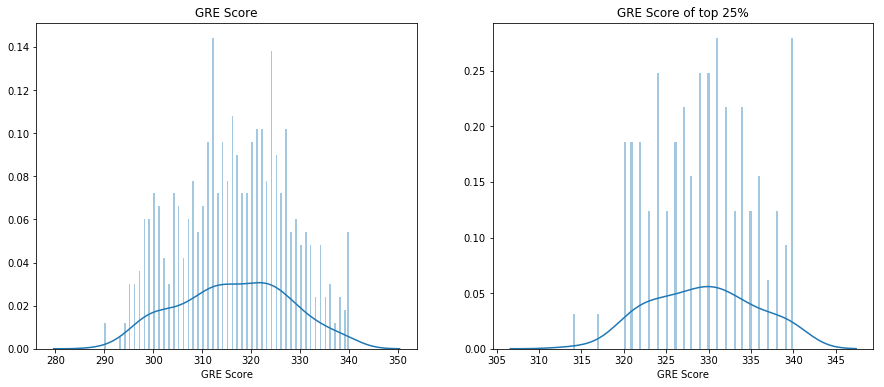

In [25]:
# statistical summary
print("Statistical summary:\n", df['GRE Score'].describe())

# distribution of data
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df['GRE Score'], bins=150, ax=ax[0])
ax[0].set_title("GRE Score")

# distribution of data of top 25% of students w.r.t. chance of admit
sns.distplot(df[df["High Chance"] == 1]['GRE Score'], bins=100, ax=ax[1])
ax[1].set_title("GRE Score of top 25%")
plt.show()

### TOEFL Score
* Min score is 92, Max score is 120, Avg score is 107.
* Most of the observations are in 103-112 range.
* Avg score of top 25% of students w.r.t. chance of admit is around 112.

Statistical summary:
 count    500.000000
mean     107.192000
std        6.081868
min       92.000000
25%      103.000000
50%      107.000000
75%      112.000000
max      120.000000
Name: TOEFL Score, dtype: float64


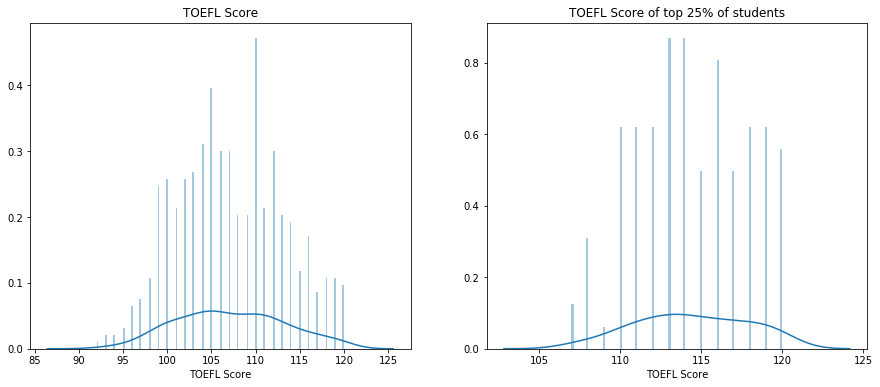

In [26]:
# statistical summary
print("Statistical summary:\n", df["TOEFL Score"].describe())

# distribution of data
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df["TOEFL Score"], bins=150, ax=ax[0])
ax[0].set_title("TOEFL Score")

# distribution of data of top 25% of students w.r.t. chance of admit
sns.distplot(df[df["High Chance"] == 1]["TOEFL Score"], bins=100, ax=ax[1])
ax[1].set_title("TOEFL Score of top 25% of students")
plt.show()

### University Rating
* Rating 3 is in highest proportion, Rating 1 is in least proportion.

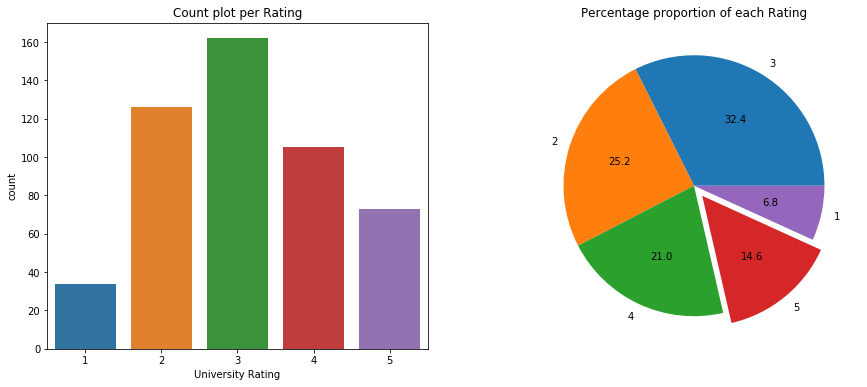

In [27]:
# count plot of each rating
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(df['University Rating'], ax=ax[0])
ax[0].set_title("Count plot per Rating")

# percentage proportions
ax[1].pie(df['University Rating'].value_counts(), labels=df['University Rating'].value_counts().index, autopct='%1.1f',
         explode=[0,0,0,0.1,0])
ax[1].set_title("Percentage proportion of each Rating")
plt.show()

### SOP
* SOP rating of 4.0 is the observation of highest frequency.
* Top 25% of students w.r.t. chance of admit are having SOP rating of 4.0 and above.

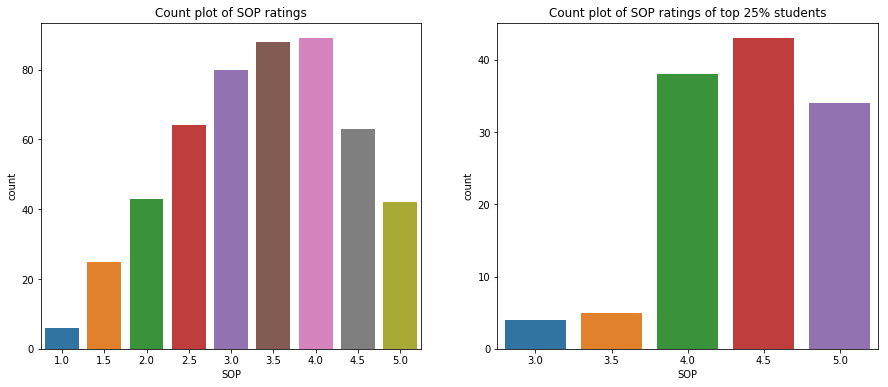

In [28]:
# count plot of each SOP rating
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(df["SOP"], ax=ax[0])
ax[0].set_title("Count plot of SOP ratings")

# count of SOP rating for top 25% of students w.r.t. chance of admit
sns.countplot(df[df["High Chance"] == 1]["SOP"], ax=ax[1])
ax[1].set_title("Count plot of SOP ratings of top 25% students")
plt.show()

### LOR
* LOR rating of 3.0 is the observation of highest frequency.
* More no. of top 25% of students w.r.t. chance of admit are having LOR rating of 4.5 and above.

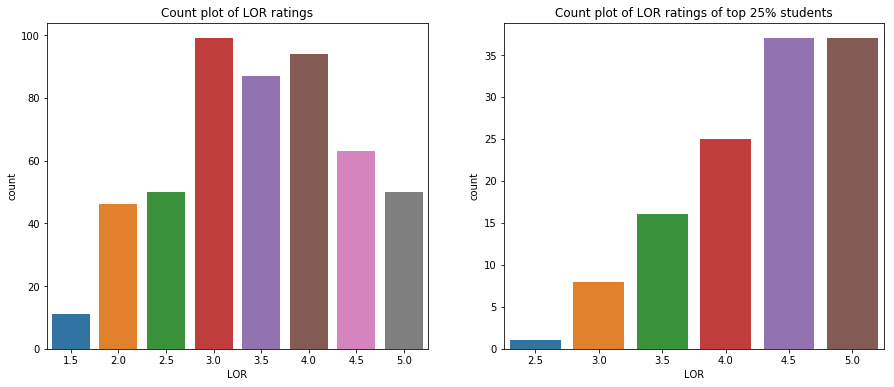

In [29]:
# count plot of each LOR rating
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(df["LOR"], ax=ax[0])
ax[0].set_title("Count plot of LOR ratings")

# count of LOR rating for top 25% of students w.r.t. chance of admit
sns.countplot(df[df["High Chance"] == 1]["LOR"], ax=ax[1])
ax[1].set_title("Count plot of LOR ratings of top 25% students")
plt.show()

### CGPA
* Min CGPA is 6.8, Max CGPA is 9.92, Avg CGPA is 8.6.
* Most of the observations are in 8.1-9.0 range.
* Avg CGPA of top 25% of students w.r.t. chance of admit is around 9.1.

Statistical summary:
 count    500.000000
mean       8.576440
std        0.604813
min        6.800000
25%        8.127500
50%        8.560000
75%        9.040000
max        9.920000
Name: CGPA, dtype: float64


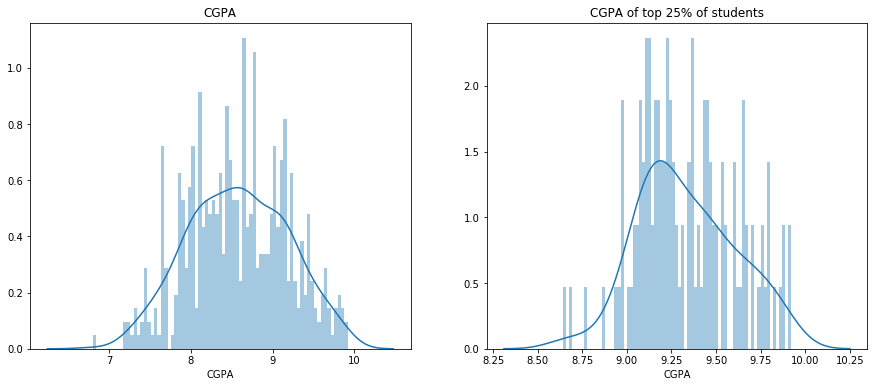

In [30]:
# statistical summary
print("Statistical summary:\n", df["CGPA"].describe())

# distribution of data
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.distplot(df["CGPA"], bins=75, ax=ax[0])
ax[0].set_title("CGPA")

# distribution of data of top 25% of students w.r.t. chance of admit
sns.distplot(df[df["High Chance"] == 1]["CGPA"], bins=75, ax=ax[1])
ax[1].set_title("CGPA of top 25% of students")
plt.show()

### Research
* No. of students with research experience is 280, and is more than no. of students without research experience 220.
* Among top 25% of students w.r.t chance of admit, 95% of the students are having research experience.

1    280
0    220
Name: Research, dtype: int64


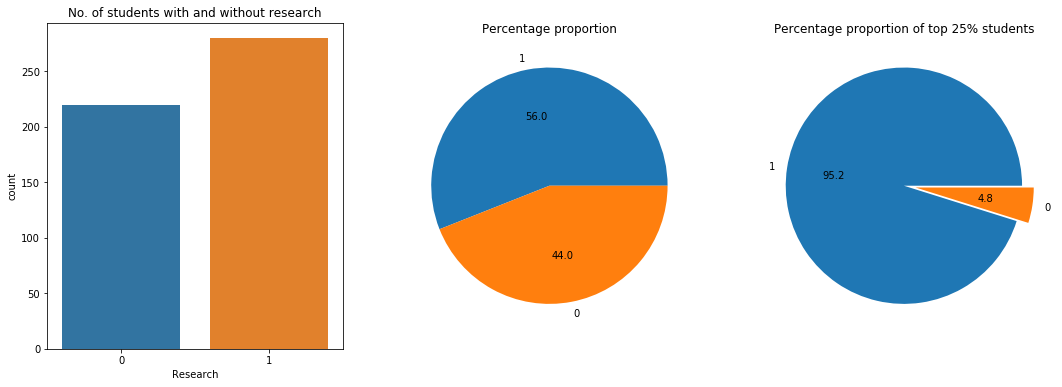

In [31]:
# no. of observations
print(df["Research"].value_counts())

# count plot of each obersations
fig, ax = plt.subplots(1,3, figsize=(18,6))
sns.countplot(df["Research"], ax=ax[0])
ax[0].set_title("No. of students with and without research")

# pie chart of percentage proportion
ax[1].pie(df["Research"].value_counts(), labels=df["Research"].value_counts().index, autopct="%1.1f")
ax[1].set_title("Percentage proportion")

# pie chart of percentage proportion for top 25% students w.r.t. chance of admit
ax[2].pie(df[df["High Chance"] == 1]["Research"].value_counts(), labels=df[df["High Chance"] == 1]["Research"].value_counts().index,
         autopct="%1.1f", explode=[0,0.1])
ax[2].set_title("Percentage proportion of top 25% students")
plt.show()

## Bivariate data analysis

Let's understand the chemistry between any two variables.

### Correlation maps
* Chance of Admit is having high positive correlation with CGPA, GRE Score and TOEFL Score.
* Also, CGPA is having high positive correlation with GRE Score and TOEFL Score.

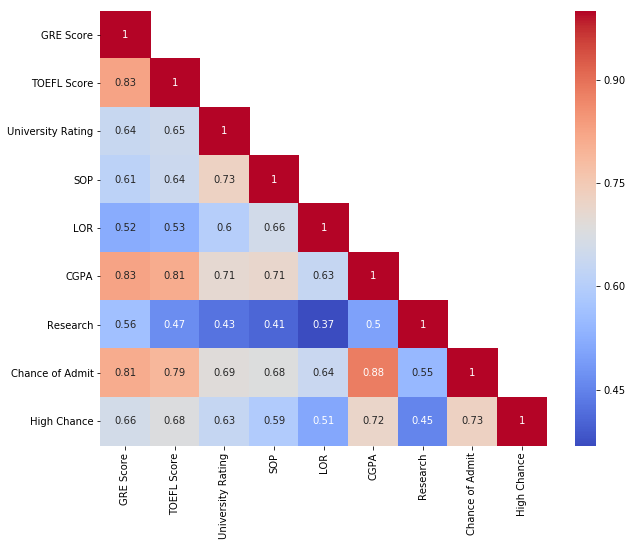

In [32]:
# heat map
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", mask=np.triu(df.corr(), 1))
plt.show()

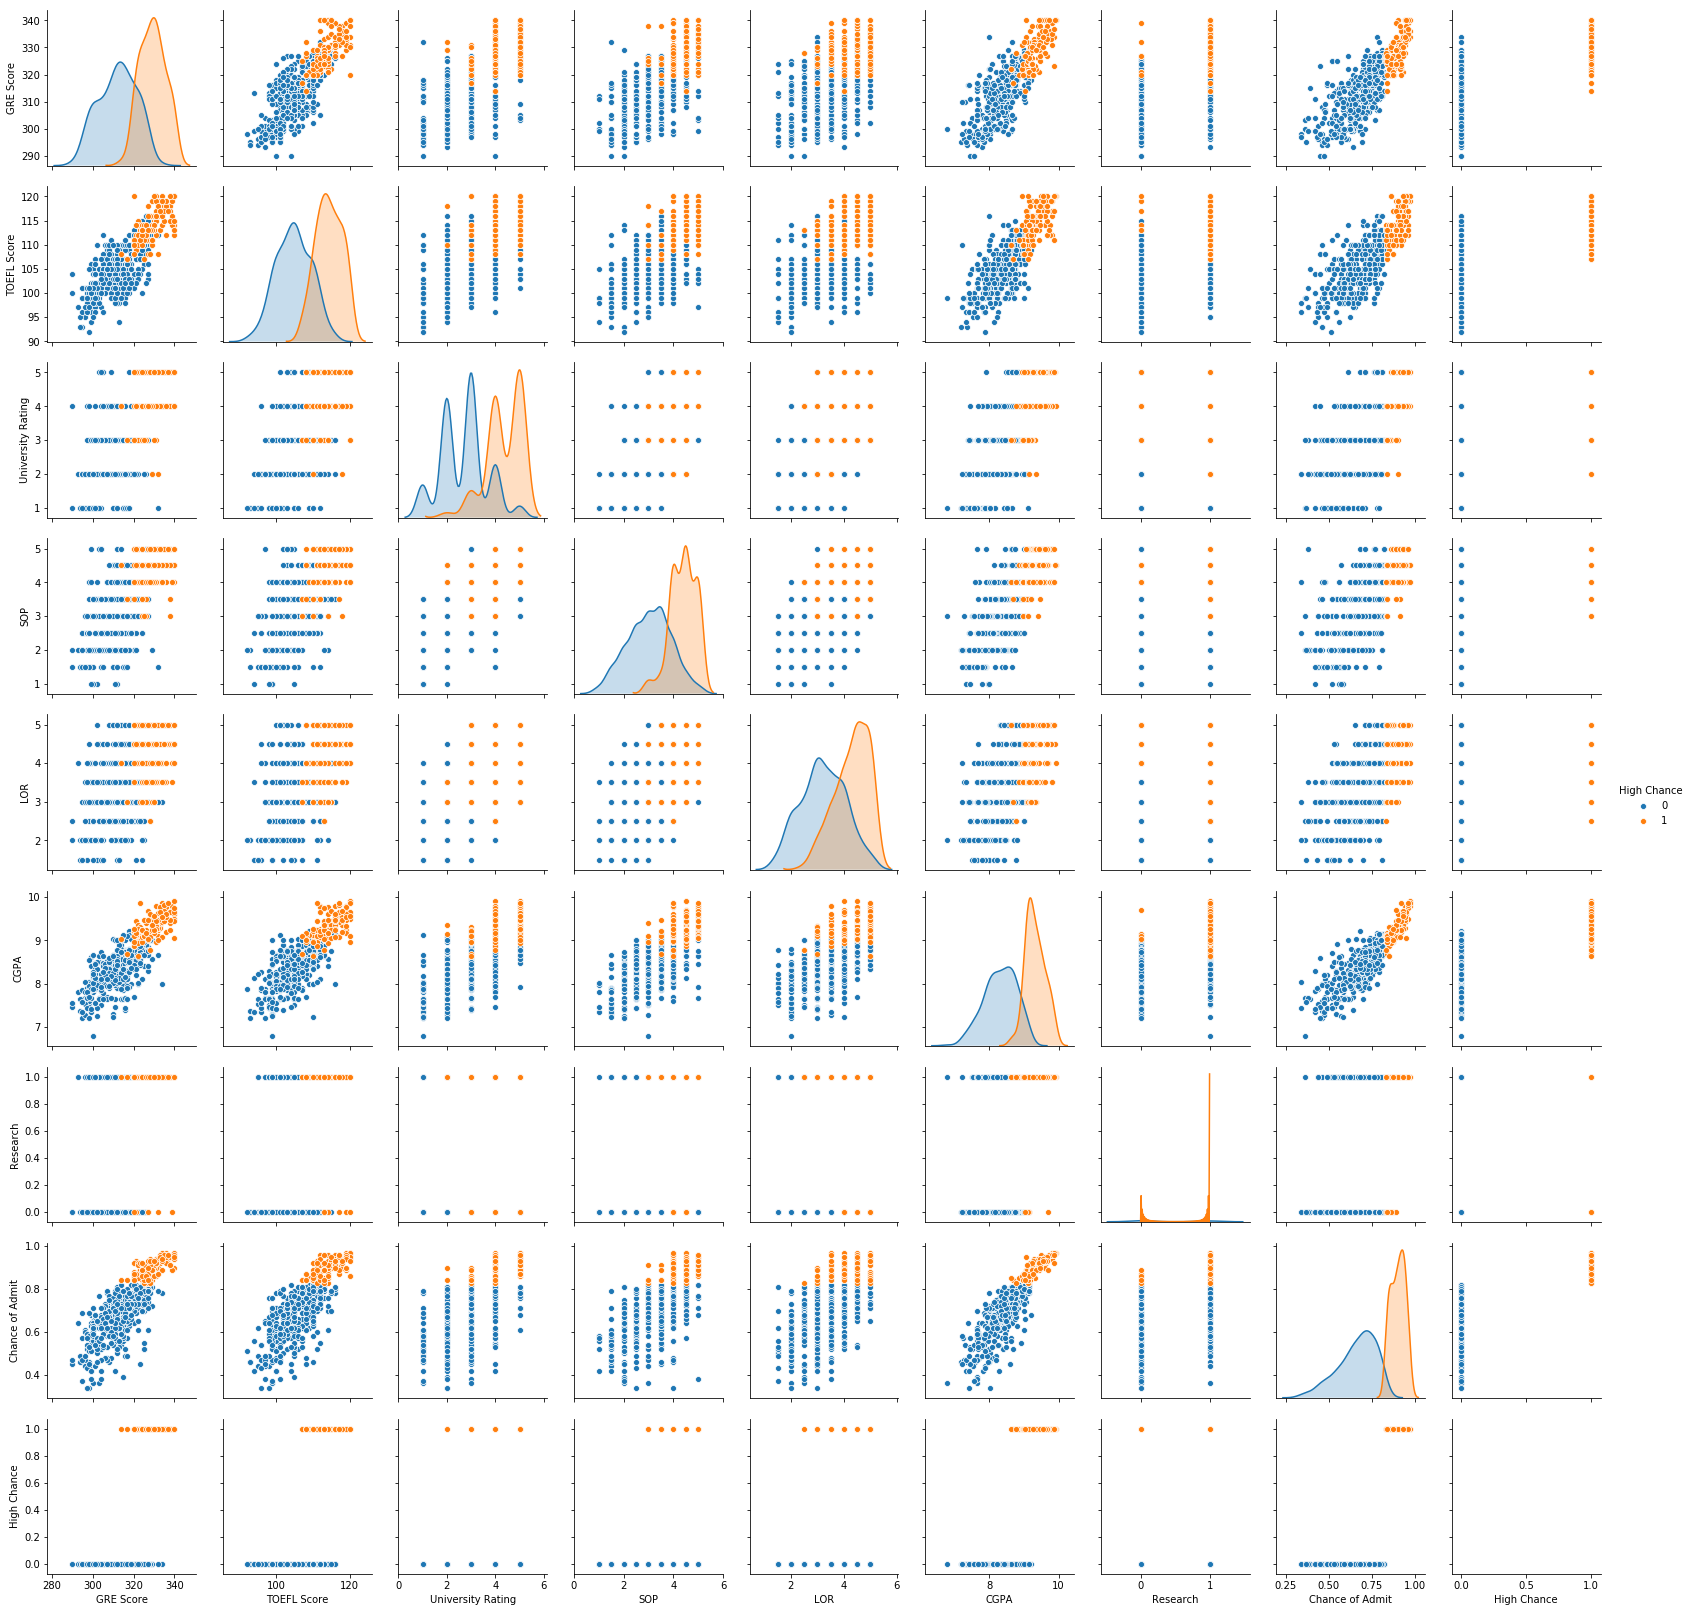

In [33]:
# pair plot
sns.pairplot(df, hue="High Chance")
plt.show()

### Chance of Admit vs (CGPA, GRE Score and TOEFL Score)
* Chance of Admit increases as CGPA, GRE Score and TOEFL Score increase.

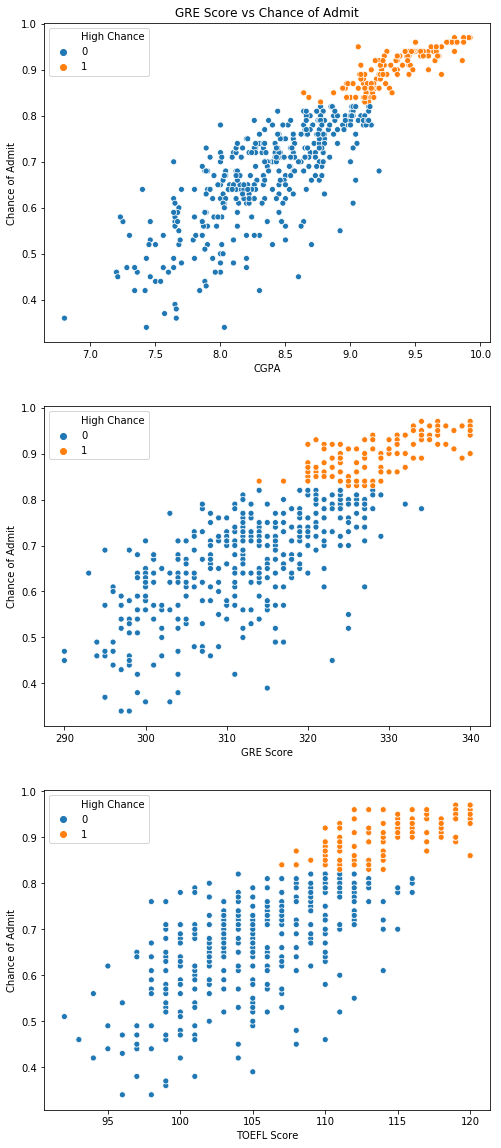

In [34]:
# scatter plots
fig, ax = plt.subplots(3,1, figsize=(8,20))
sns.scatterplot(data=df, x="CGPA", y="Chance of Admit", hue="High Chance", ax=ax[0])
ax[0].set_title("GRE Score vs Chance of Admit")

sns.scatterplot(data=df, x="GRE Score", y="Chance of Admit", hue="High Chance", ax=ax[1])
ax[0].set_title("GRE Score vs Chance of Admit")

sns.scatterplot(data=df, x="TOEFL Score", y="Chance of Admit", hue="High Chance", ax=ax[2])
ax[0].set_title("GRE Score vs Chance of Admit")

plt.show()

### Chance of Admit vs (SOP and LOR)
* Chance of Admit is higher for higher SOP and LOR ratings.

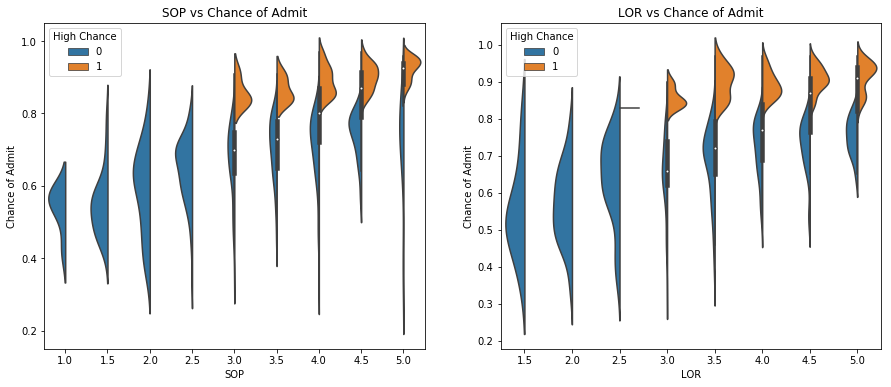

In [35]:
# violin plots
fig, ax = plt.subplots(1,2, figsize=(15,6))
sns.violinplot(data=df, x="SOP", y="Chance of Admit", hue="High Chance", split=True, ax=ax[0])
ax[0].set_title("SOP vs Chance of Admit")

sns.violinplot(data=df, x="LOR", y="Chance of Admit", hue="High Chance", split=True, ax=ax[1])
ax[1].set_title("LOR vs Chance of Admit")

plt.show()

### Chance of Admit vs Research
* The mean value of Chance of Admit for students with research experience is greater than the mean value of those without research experience.
* Proportion of students with research experience among top 25% of student w.r.t Chance of Admit is far greater than those without any research experience.

Research            0         1
High Chance                    
0            0.569149  0.430851
1            0.048387  0.951613


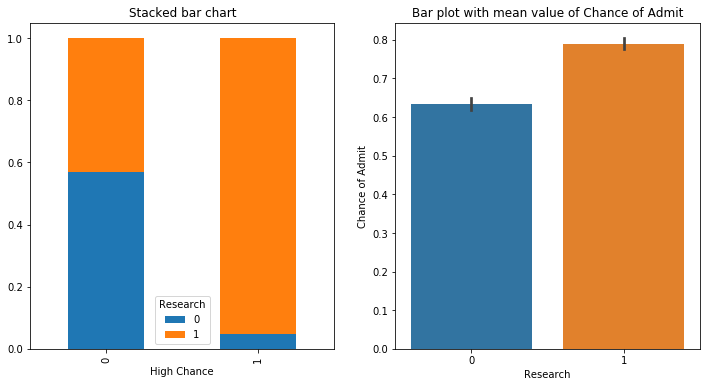

In [36]:
# proportional plot
ct_highchance_research = pd.crosstab(df["High Chance"], df["Research"], normalize=0)
print(ct_highchance_research)

# stacked bar chart to show the proportion of students with and without reasearch experience  
fig, ax = plt.subplots(1,2, figsize=(12,6))
ct_highchance_research.plot.bar(stacked=True, ax=ax[0])
ax[0].set_title("Stacked bar chart")

# bar plot with mean value of Chance of Admit for each research category
sns.barplot(data=df, x="Research", y="Chance of Admit", ax=ax[1])
ax[1].set_title("Bar plot with mean value of Chance of Admit")

plt.show()

# Data pre-processing

In [37]:
# columns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
High Chance          500 non-null int64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


## Splitting dataframe into dependent and independent variables

- Dependent variable: `Chance of Admit`
- Independent variables: `GRE Score`, `TOEFL Score`, `University Rating`, `SOP`, `LOR`, `CGPA`, `Research`

In [38]:
# creating dependent variable
y = df["Chance of Admit"]

# creating independent variables
X = df.drop(columns=["Chance of Admit","High Chance"])

X.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,337,118,4,4.5,4.5,9.65,1
1,324,107,4,4.0,4.5,8.87,1
2,316,104,3,3.0,3.5,8.00,1
3,322,110,3,3.5,2.5,8.67,1
4,314,103,2,2.0,3.0,8.21,0


## Identifying continuous and categorical variables

Only Research is categorical variable, rest all are numeric variables (CGPA, GRE Score and TOEFL Score are continuous, others are ordinal).

In [39]:
# creating list of categorical 
list_categorical_columns = ["Research"]
print("Categorical variables:\t", list_categorical_columns)

# creating list of numeric variable
list_numeric_columns = list(X.drop(columns="Research").columns)
print("Numeric variables:\t", list_numeric_columns)

Categorical variables:	 ['Research']
Numeric variables:	 ['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR', 'CGPA']


## Encoding categorical variables

Since we will be using regression model, we will use 1_hot encoding for categorical variables.

In [40]:
# getting the unique values for categorical variables
for col in list_categorical_columns:
    print(col)
    print(df[col].value_counts())
    print()

Research
1    280
0    220
Name: Research, dtype: int64



**Observations:**
- Since we have only one categorical variable and also the variable is having two classes, 0 and 1, we need not do any encoding.
- We will change the datatype of the variable from int to uint8.

In [41]:
# changing the datatype to uint8
X["Research"] = X["Research"].astype("uint8")

## Splitting into train and test datasets

In [71]:
# splititng my data into 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Let's scale the data

In [82]:
# initializing scaler and fitting with train data
ss = StandardScaler().fit(X_train[list_numeric_columns])

# transforming train data
X_train[list_numeric_columns] = ss.transform(X_train[list_numeric_columns])

# transforming test data
X_test[list_numeric_columns] = ss.transform(X_test[list_numeric_columns])

# Model building

Let's build a regression model since the data in simple.

## Linear regression model

In [84]:
# initializing and fitting the model
model_lr = LinearRegression().fit(X_train,y_train)

# predicting using training data
y_pred_train = model_lr.predict(X_train)

# predicting using test data
y_pred_test = model_lr.predict(X_test)

## Model evaluation

In [81]:
# lets compare model performance on trainig and test data to check for overfitting
print("Train vs Test model performance results:")
pd.DataFrame(zip([np.sqrt(mean_squared_error(y_pred_train,y_train)), np.sqrt(mean_squared_error(y_pred_test,y_test))],
                 [r2_score(y_pred_train,y_train), r2_score(y_pred_test,y_test)]), columns=["RMSE", "R-squared"], index=["Train","Test"])

Train vs Test model performance results:


,RMSE,R-squared
Train,0.059385,0.782073
Test,0.061129,0.792315


**Observations:**
- There is no significant difference between model performance on training and test data, suggesting there is no overfitting of the model.
- Hence, we keep the above model as the final one.